In [1]:
# imports
import pandas as pd
import os
from random import randint
import sys

import coverart  # modified coverart script from https://github.com/mobeets/cover-art

In [2]:
# import csv file to Pandas dataframe, read number of line

filename = 'sabands.csv'

data = pd.read_csv(filename, delimiter=",", header=0)
data = data.dropna()
numlines = data.shape[0]

print('Total data lines: {}'.format(numlines))

Total data lines: 411


In [28]:
# create output dataframe, select two random entries from input and delete from original

outdf = pd.DataFrame(columns=data.columns)

selectnums = [randint(0,numlines) for p in range(0,2)]

i = 0
for i in range(0,2):
    s = selectnums[i]
    r = data.iloc[s]
    outdf.loc[i] = r
    data = data.drop(data.index[s]) # delete these entries from the dataframe
    ++i

#file to hold results
outlist = []
outfile = 'out.txt'
    
# write results to output file in format expected by coverart.py
with open('out.txt', 'a') as w:
    choice0 = outdf.iloc[0]['Artist'] + ' - ' + outdf.iloc[0]['Album']
    w.write(choice0+'\n')
    choice1 = outdf.iloc[1]['Artist'] + ' - ' + outdf.iloc[1]['Album']
    w.write(choice1+'\n')

print('Album choice 1: ' + choice0 + '\nAlbum choice 2: ' + choice1)
outlist.append(choice0)
outlist.append(choice1)
print(outlist)

# write out a new list minus selected entries
# this OVERWRITES the original!
with open(filename, 'w') as outfile:
    data.to_csv(filename, index=False)

Album choice 1: Squeal - Long Pig
Album choice 2: Felix Laband - Deaf Safari
['Squeal - Long Pig', 'Felix Laband - Deaf Safari']


In [29]:
# download album covers
coverart.main(outlist, 'out')

Squeal - Long Pig
    Saved out/Squeal - Long Pig.jpeg
Felix Laband - Deaf Safari
    Saved out/Felix Laband - Deaf Safari.jpeg


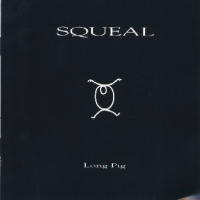

Squeal - Long Pig



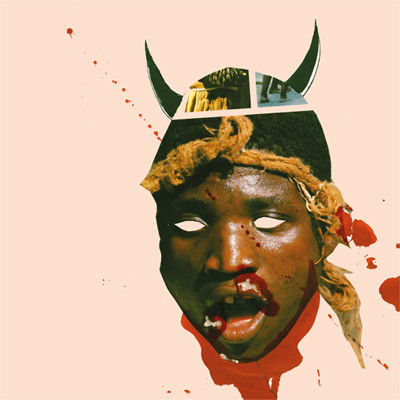

Felix Laband - Deaf Safari



In [32]:
from IPython.display import Image

for album in outlist:
    albumstring = 'out/' + album + '.jpeg'
    display(Image(filename=albumstring, width=450))
    print(album+'\n')